<h4> Problem testowania wielu hipotez

<h4> Zadanie1: Jeżeli przy podejmowaniu jednej decyzji prawdopodobieństwo popełnienia błędu wynosi $\alpha=0.05$ (czyli prawdopodobieństwo nie popełnienia błędu wynosi $0.95$), to ile wynosi prawdopodobieństwo, że popełnimy chociaż jeden błąd podejmując 10 decyzji?

* Przykład

In [12]:
d = data.frame(x1 = runif(10), x2 = runif(10), x3 = runif(10), x4 = runif(10), x5 = runif(10), x6 = runif(10), x7 = runif(10), x8 = runif(10), x9 = runif(10), x10 = runif(10))
print(d)

           x1         x2         x3        x4         x5        x6         x7
1  0.86973219 0.44879954 0.56956978 0.5399394 0.05062531 0.2416438 0.95050569
2  0.11729616 0.20879027 0.58914819 0.7955516 0.72626897 0.5972787 0.54052821
3  0.95729100 0.33837589 0.54783174 0.2038272 0.80054366 0.6556987 0.62561603
4  0.63243348 0.79109916 0.64375826 0.4516913 0.81122033 0.2004249 0.52667075
5  0.66302481 0.98253844 0.71890349 0.5910430 0.68387110 0.1410845 0.70129688
6  0.78734241 0.79004623 0.87027701 0.1898235 0.79567996 0.5785168 0.01575992
7  0.13223287 0.53238627 0.13707542 0.4317280 0.77629397 0.6375627 0.65259199
8  0.58181883 0.18135394 0.18314859 0.2920707 0.05244806 0.2257236 0.66763002
9  0.01394255 0.07038853 0.05413063 0.8431067 0.37401433 0.1901330 0.62032693
10 0.62293197 0.34152032 0.42082422 0.2989033 0.16318274 0.9589149 0.64576017
          x8        x9         x10
1  0.5559295 0.7069076 0.008872123
2  0.5784351 0.8451550 0.251572212
3  0.7604320 0.9271913 0.489831409
4 

In [13]:
p_values = c()
for (i in 1:9){
    for (j in (i+1):10){
            p_values = append(p_values, t.test(x=d[,i], y=d[,j] ,conf.level=0.90)$p.value)
    }
}

print(p_values)

 [1] 0.63168071 0.64052118 0.57102275 0.92339986 0.49693691 0.66455481
 [7] 0.70550628 0.24772419 0.30287504 0.96960147 0.96879304 0.70091909
[13] 0.84421625 0.31066582 0.32818068 0.07973829 0.55125437 0.93192582
[19] 0.71358795 0.80406440 0.29692792 0.31298042 0.06643469 0.50622590
[25] 0.64337867 0.85549569 0.22345659 0.23210560 0.03873978 0.52966923
[31] 0.55931028 0.58290224 0.61925308 0.20212785 0.34504310 0.20271010
[37] 0.21157775 0.04218800 0.66964306 0.92993207 0.36385326 0.10544489
[43] 0.29732004 0.10871881 0.02175114


<h4> T-test

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

Założenia:
- rozkład normalny
- ta sama wariancja
- niezależność

In [14]:
mel = read.delim(file = 'melatonina.txt', sep=" ") #dane dotyczą 20 doroslych mezczyzn. 10 z nich otrzymalo melatonine przed snem (5mg). Czy mialo to wplyw na dlugosc snu?
print(head(mel))

  id    sleep     group
1  1 8.145150   control
2  2 7.522362 treatment
3  3 6.935754   control
4  4 8.959435 treatment
5  5 6.985122   control
6  6 8.072651 treatment


In [16]:
mel_c = mel[mel$group == "control",]
shapiro.test(subset(mel_c, select = c(sleep))$sleep); sd(subset(mel_c, select = c(sleep))$sleep)

mel_t = mel[mel$group == "treatment",]
shapiro.test(subset(mel_t, select = c(sleep))$sleep); sd(subset(mel_t, select = c(sleep))$sleep)


	Shapiro-Wilk normality test

data:  subset(mel_c, select = c(sleep))$sleep
W = 0.93638, p-value = 0.5135


[1] 1.67219


	Shapiro-Wilk normality test

data:  subset(mel_t, select = c(sleep))$sleep
W = 0.92649, p-value = 0.4143


[1] 1.555904

In [19]:
t.test(sleep ~ group, data = mel) #czy srednie pomiedzy kontrolą a grupą traktowaną sie roznią? Jezeli przyjmiemy poziom istotnosci 0.10 to tak, jezeli 0.05 to nie


	Welch Two Sample t-test

data:  sleep by group
t = -2.0854, df = 17.907, p-value = 0.05161
alternative hypothesis: true difference in means between group control and group treatment is not equal to 0
95 percent confidence interval:
 -3.02434584  0.01173884
sample estimates:
  mean in group control mean in group treatment 
               6.827152                8.333456 


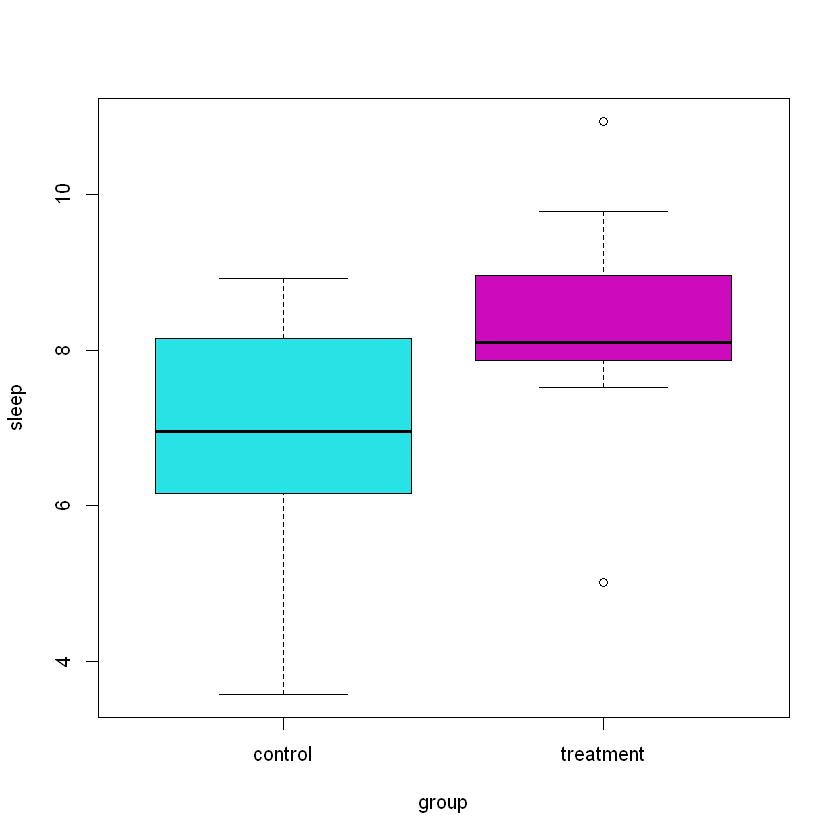

In [20]:
options(repr.plot.width=7, repr.plot.height=7)
boxplot(sleep ~ group, data = mel, col = 5:6)

<h4> Test Wilcoxon-Mann-Whitney

In [21]:
library(ggplot2)
head(msleep) #dane są z ggplot2

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


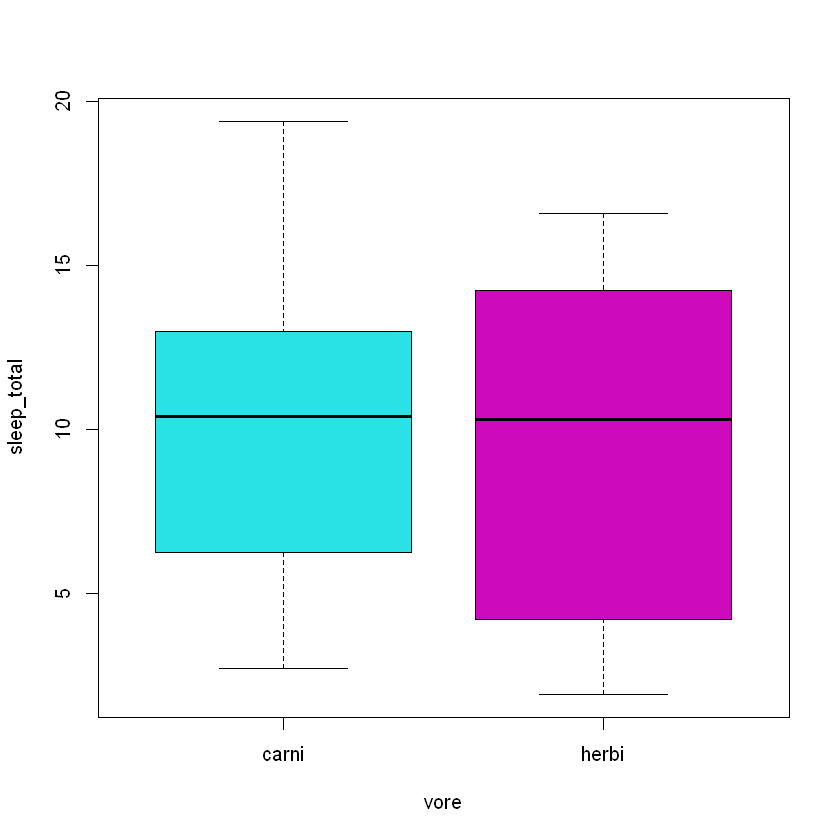

In [22]:
t = subset(msleep, vore == "carni" | vore == "herbi")
boxplot(sleep_total ~ vore, data = t, col = 5:6)

In [23]:
wilcox.test(sleep_total ~ vore, data = t,  exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  sleep_total by vore
W = 325, p-value = 0.6895
alternative hypothesis: true location shift is not equal to 0


- Co jeżeli więcej niż 2 grupy?

<h3> Analiza wariancji (ANOVA)

- niezależność
- normalność rozkładu <- istotne dla małych próbek
- równość wariancji

- ANOVA Jednoczynnikowa

In [25]:
library(faraway)
names(coagulation)

In [ ]:
head(coagulation) #24 zwierzeta podzielone na 4 grupy ze wzgledu na rodzaj diety (coag = czas koagulacji (krzepniecia) krwi w sekundach)

coag,diet
62,A
60,A
63,A
59,A
63,B
67,B


In [ ]:
print(coagulation$diet)

 [1] A A A A B B B B B B C C C C C C D D D D D D D D
Levels: A B C D


In [ ]:
?coagulation

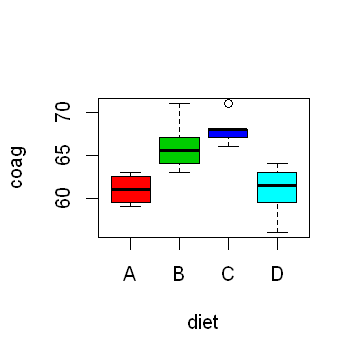

In [ ]:
plot(coag ~ diet, data = coagulation, col = 2:5) , #dodatkowo mozna sprawdzic print(bartlett.test(coag ~ diet, data = coagulation))

In [ ]:
coag_aov = aov(coag ~ diet, data = coagulation) #test ANOVA
print(coag_aov)

Call:
   aov(formula = coag ~ diet, data = coagulation)

Terms:
                diet Residuals
Sum of Squares   228       112
Deg. of Freedom    3        20

Residual standard error: 2.366432
Estimated effects may be unbalanced


In [ ]:
summary(coag_aov) #dieta ma wplyw

            Df Sum Sq Mean Sq F value   Pr(>F)    
diet         3    228    76.0   13.57 4.66e-05 ***
Residuals   20    112     5.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
diety = data.frame(diet = unique(coagulation$diet))
data.frame(diety, coag = predict(coag_aov, diety)) #srednie przewidziane dla kazdej grupy

diet,coag
A,61
B,66
C,68
D,61


In [ ]:
#ale ktore srednie są rozne?
with(coagulation, pairwise.t.test(coag, diet, p.adj = "none"))


	Pairwise comparisons using t tests with pooled SD 

data:  coag and diet 

  A       B       C      
B 0.00380 -       -      
C 0.00018 0.15878 -      
D 1.00000 0.00086 2.3e-05

P value adjustment method: none 

In [ ]:
with(coagulation, pairwise.t.test(coag, diet, p.adj = "bonferroni")) #uwzględniając poprawkę Bonferroniego (wielokrotne testowanie); obserwujemy wyzsze wartosci p-value


	Pairwise comparisons using t tests with pooled SD 

data:  coag and diet 

  A       B       C      
B 0.02282 -       -      
C 0.00108 0.95266 -      
D 1.00000 0.00518 0.00014

P value adjustment method: bonferroni 

In [ ]:
#Test HSD Tukeya (stosowany post hoc - po analizie wariancji)
TukeyHSD(coag_aov, conf.level = 0.95) #uwzglednia poprawke na wielokrotne powtorzenia

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = coag ~ diet, data = coagulation)

$diet
             diff         lwr       upr     p adj
B-A  5.000000e+00   0.7245544  9.275446 0.0183283
C-A  7.000000e+00   2.7245544 11.275446 0.0009577
D-A -1.421085e-14  -4.0560438  4.056044 1.0000000
C-B  2.000000e+00  -1.8240748  5.824075 0.4766005
D-B -5.000000e+00  -8.5770944 -1.422906 0.0044114
D-C -7.000000e+00 -10.5770944 -3.422906 0.0001268


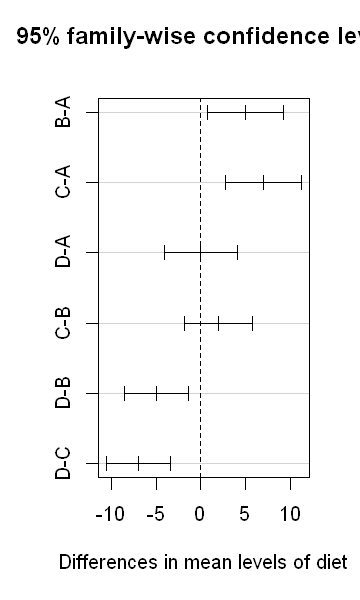

In [ ]:
options(repr.plot.width=3, repr.plot.height=5)
plot(TukeyHSD(coag_aov, conf.level = 0.95))

- ANOVA Wieloczynnikowa

In [40]:
d_gp = read.csv("gp.csv")
print(head(d_gp)) #efekt witaminy C na wzrost zębów u świnek morskich - dwa czynniki --> rodzaj suplementu i dawka

   len supp dose
1  4.2   VC  0.5
2 11.5   VC  0.5
3  7.3   VC  0.5
4  5.8   VC  0.5
5  6.4   VC  0.5
6 10.0   VC  0.5


In [41]:
d_gp$dose = as.factor(d_gp$dose)

In [43]:
summary(d_gp)

      len             supp            dose   
 Min.   : 4.200   Length:40          0.5:20  
 1st Qu.: 9.925   Class :character   1  :20  
 Median :15.200   Mode  :character           
 Mean   :15.170                              
 3rd Qu.:19.775                              
 Max.   :27.300                              

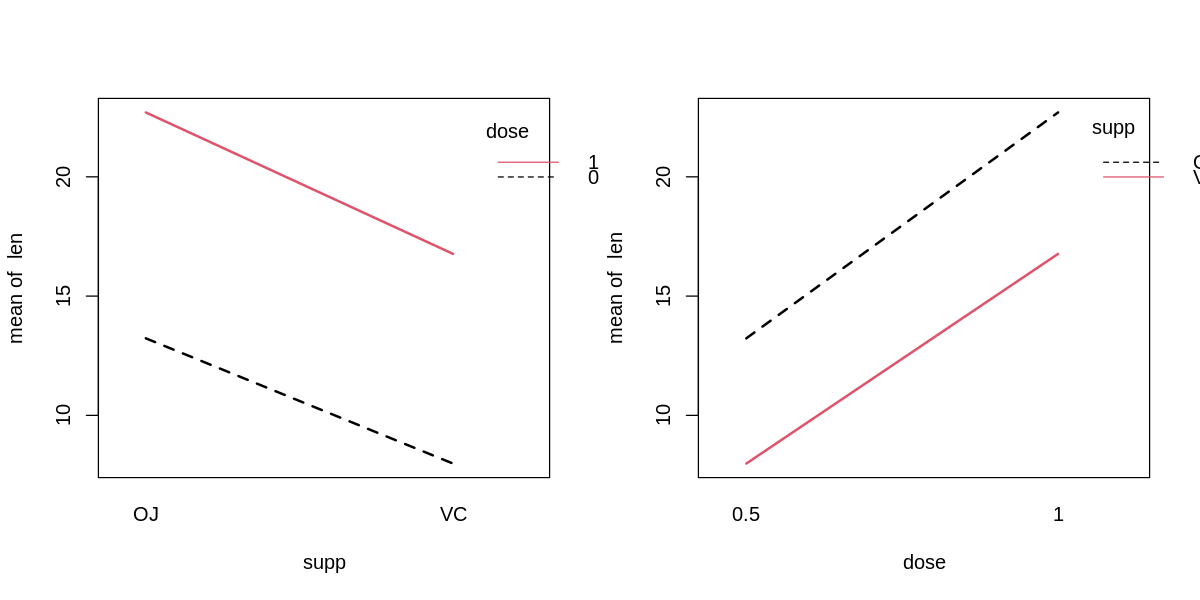

In [66]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(1, 2))
with(d_gp, interaction.plot(supp, dose, len, lwd = 2, col = 1:2))
with(d_gp, interaction.plot(dose, supp, len, lwd = 2, col = 1:2))

In [46]:
model_supp = aov(len~supp, data = d_gp)
print(summary(model_supp))

            Df Sum Sq Mean Sq F value  Pr(>F)   
supp         1  312.5  312.48   9.304 0.00415 **
Residuals   38 1276.2   33.58                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [47]:
model_dose = aov(len~dose, data = d_gp)
print(summary(model_dose))

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         1  833.6   833.6   41.95 1.27e-07 ***
Residuals   38  755.1    19.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [48]:
model_add = aov(len~supp+dose, data = d_gp)
print(summary(model_add))

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  312.5   312.5   26.12 1.00e-05 ***
dose         1  833.6   833.6   69.67 4.95e-10 ***
Residuals   37  442.7    12.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
model_int = aov(len~supp*dose, data = d_gp)
print(summary(model_int))

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  312.5   312.5  25.480 1.30e-05 ***
dose         1  833.6   833.6  67.970 8.25e-10 ***
supp:dose    1    1.2     1.2   0.094    0.761    
Residuals   36  441.5    12.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [51]:
print(anova(model_add, model_int)) #czy model rozszerzony jest istotnie lepszy?

Analysis of Variance Table

Model 1: len ~ supp + dose
Model 2: len ~ supp * dose
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     37 442.65                           
2     36 441.50  1     1.156 0.0943 0.7606


In [52]:
TukeyHSD(aov(len~supp+dose, data = d_gp))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp + dose, data = d_gp)

$supp
       diff       lwr       upr p adj
VC-OJ -5.59 -7.806216 -3.373784 1e-05

$dose
      diff      lwr      upr p adj
1-0.5 9.13 6.913784 11.34622     0


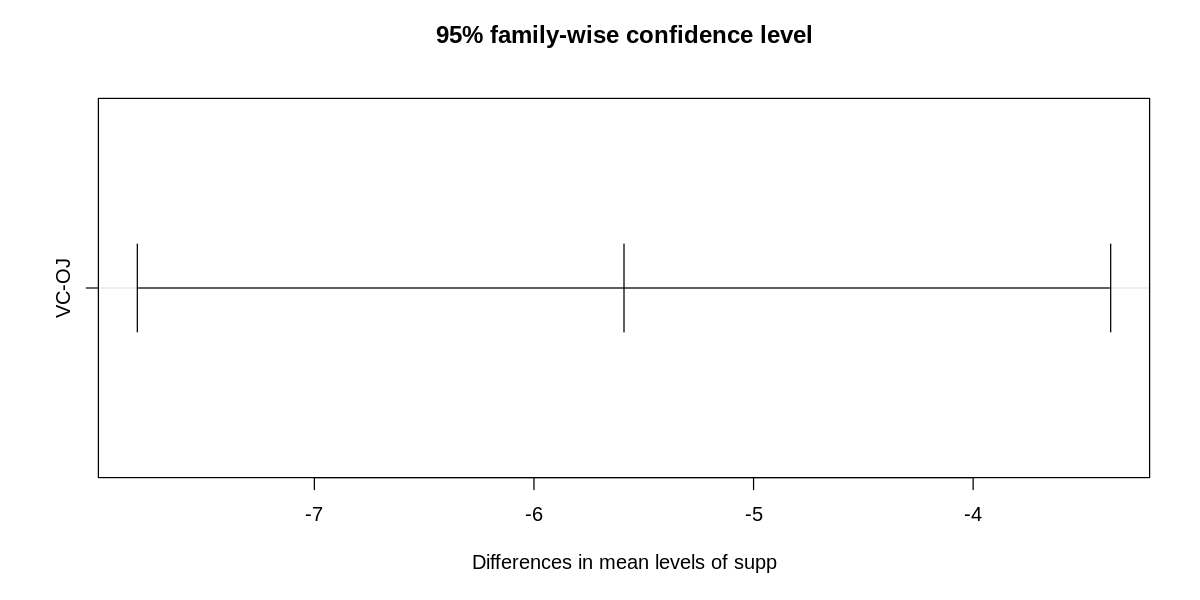

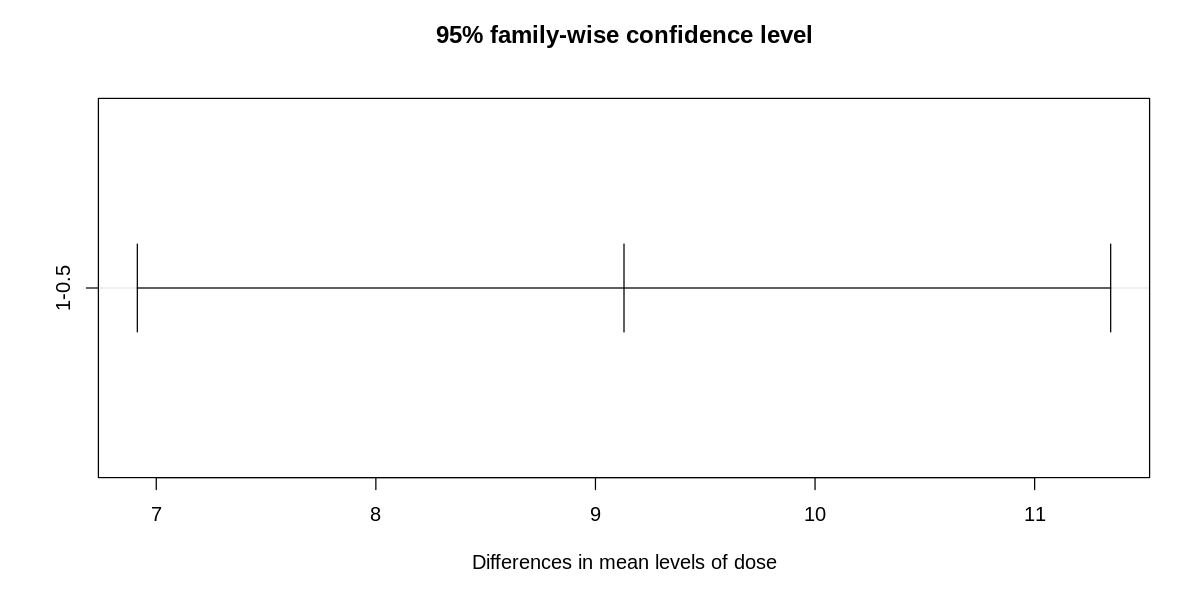

In [53]:
plot(TukeyHSD(aov(len~supp+dose, data = d_gp)))

<h4> Zadanie2: Rozważ dane $warpbreaks$. Czego dotyczą te dane? Narysuj odpowiednie wykresy interakcji pomiędzy wool and tension. Wykonaj test anova. Czy zachodzi tutaj interakcja? Skomentuj otrzymane wyniki.

In [54]:
?warpbreaks

In [55]:
head(warpbreaks)

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


<h4> Zadanie3: Rozważ dane AD.csv dotyczące pacjentów (kontrola vs choroba Alzheimera).
    
- Sprawdź czy średnia objętość hippokampa (HippoNV) różni się istonie między kontrolą a chorymi (DX_bl).
- Wybierz kolumny 8, 9 (warianty genu APOE) oraz 17 (wynik testu MMSE - stosowany w diagnostyce demencji). Zbadaj wpływ polimorfizmu APOE na wynik testu MMSE. Czy któryś z wariantów może być uznany za istotny czynnik ryzyka?

<h3> Test Kruskala-Wallisa

- stosujemy gdy problem z założeniem normalności (ciągle jednak zakładamy równe wariancje); zadajemy pytanie czy grupy mają równe mediany (H0)

In [ ]:
library(MASS) #tam m.in. jest zbior survey
head(survey)

Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


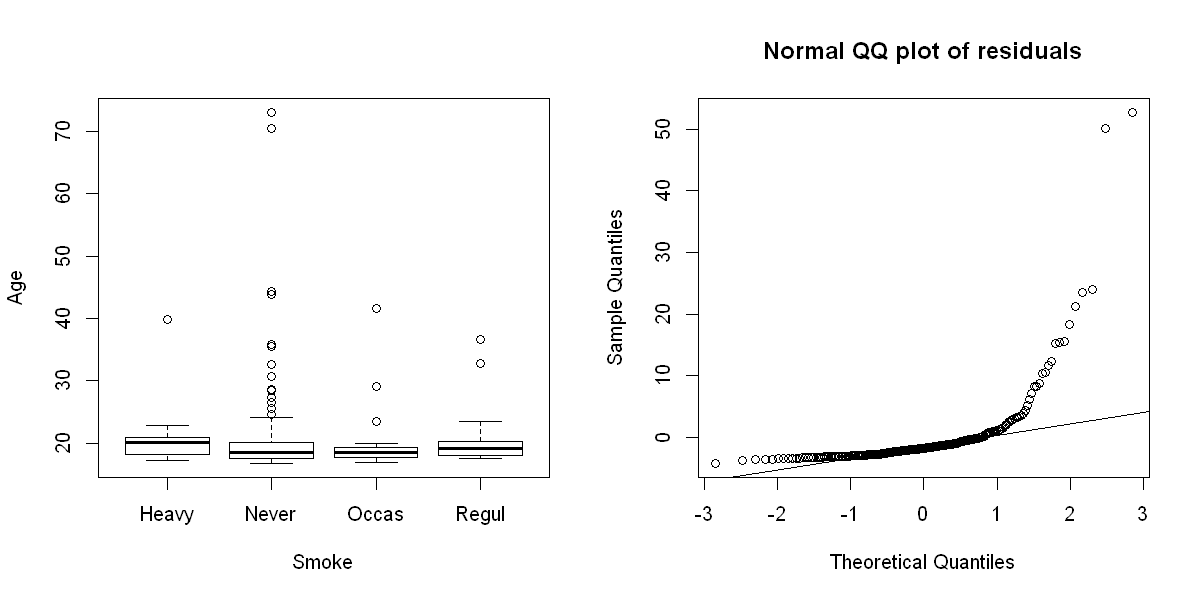

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(1, 2))
boxplot(Age~Smoke,data=survey)
age.means <- tapply(survey$Age,survey$Smoke,mean) #srednia z wieku wg Smoke
age.meancen <- survey$Age-age.means[as.numeric(survey$Smoke)]
qqnorm(age.meancen,main="Normal QQ plot of residuals")
qqline(age.meancen)

In [ ]:
age.means

Heavy    Never    Occas    Regul 
21.39400 20.26151 20.34216 21.12747

In [ ]:
kruskal.test(Age~Smoke,data=survey) #nie wskazuje na istotną roznicę


	Kruskal-Wallis rank sum test

data:  Age by Smoke
Kruskal-Wallis chi-squared = 3.9262, df = 3, p-value = 0.2695


<h3> Uzupełnienie

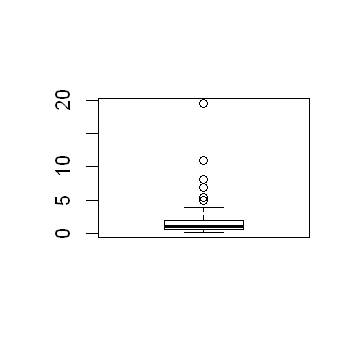

In [ ]:
options(repr.plot.width=3, repr.plot.height=3)
y = c(0.38,1.43,1.2,1.45,1.44,0.98,6.91,2.28,1.02,0.55,1.18,0.59,0.41,1.08,0.75,1.99,0.14,1.64,2.54,1.94,1.7,1.04,0.67,2.59,0.34,0.48,0.4,0.25,0.3,8.07,5.41,10.9,3.85,0.59,1.61,0.48,1.71,0.78,0.74,0.49,1.07,3.18,19.53,0.37,0.46,2.71,1.01,1.3,4.98,0.78)
boxplot(y)

In [ ]:
shapiro.test(y)


	Shapiro-Wilk normality test

data:  y
W = 0.55292, p-value = 4.139e-11


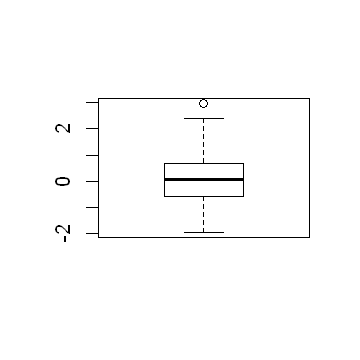

In [ ]:
#transformacja danych

y2 = log(y)
boxplot(y2)

In [ ]:
shapiro.test(y2)


	Shapiro-Wilk normality test

data:  y2
W = 0.97701, p-value = 0.434


<h4> Zadanie4: Zaproponuj transformację danych tak aby rozkład danych po tej operacji był normalny. Wyświetl nowe dane.

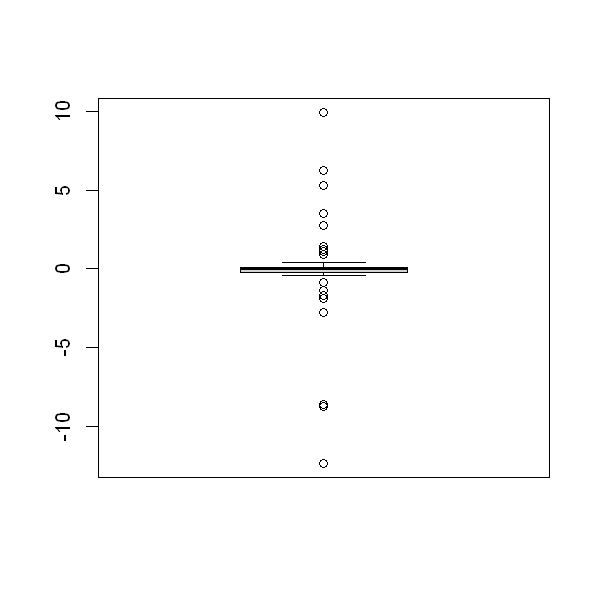

In [3]:
options(repr.plot.width=5, repr.plot.height=5)
y = c(-0.11,6.26,0.07,-0.29,-0.16,1.1,0,1.41,5.33,-1.7,0.4,-1.66,-0.83,-0.02,0,-0.06,-0.01,-0.08,-0.18,-8.74,1.24,-0.41,-1.87,0.93,0.01,9.97,0.11,0.01,2.78,-0.32,0.01,-0.22,0.44,0.01,-8.62,0.02,0.08,-12.39,0,0.17,0.1,-2.78,3.51,0.06,-0.01,0,0.08,-1.37,0.02,0)
boxplot(y)